In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("accident.csv")

In [6]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [9]:
df = df.drop_duplicates()

numeric_imputer = SimpleImputer(strategy='median')
df['Speed_of_Impact'] = numeric_imputer.fit_transform(df[['Speed_of_Impact']])

mode_gender = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(mode_gender)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           200 non-null    object 
 2   Speed_of_Impact  200 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [11]:

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Helmet_Used'] = le.fit_transform(df['Helmet_Used'])
df['Seatbelt_Used'] = le.fit_transform(df['Seatbelt_Used'])


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

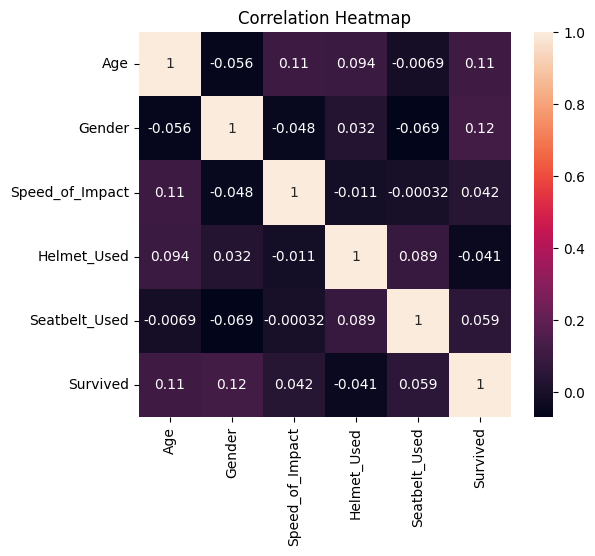

In [13]:
plt.figure(figsize=(6,5))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

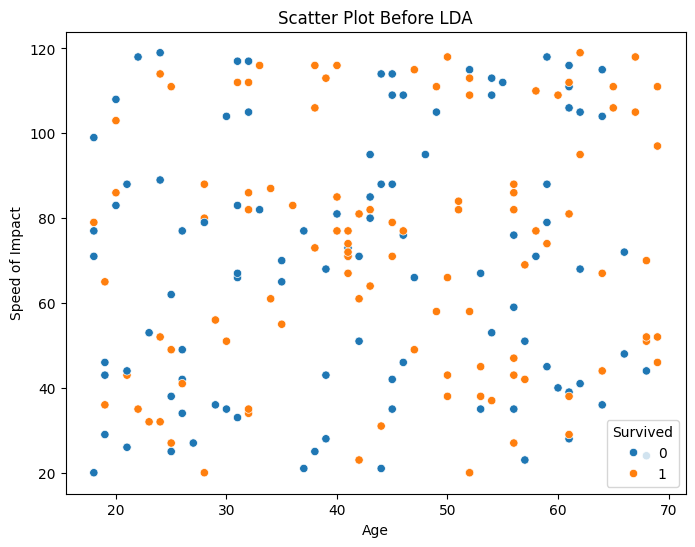

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Speed_of_Impact', data=df, hue='Survived')
plt.title('Scatter Plot Before LDA')
plt.xlabel('Age')
plt.ylabel('Speed of Impact')
plt.show()

In [16]:
X = df.drop('Survived',axis = 1)
y = df['Survived']
X_train, x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train,Y_train)
x_test = lda.transform(x_test)

In [18]:
'''
temp_df = pd.DataFrame(X_train,columns = ['LDA Component'])
temp_df['Survived'] = Y_train


plt.figure(figsize=(8,6))
sns.scatterplot(x='Survived', y='LDA Component', data=temp_df, hue='Survived')
plt.title('Scatter Plot After LDA')
plt.xlabel('Survived')
plt.ylabel('LDA Component')
plt.show()
'''

"\ntemp_df = pd.DataFrame(X_train,columns = ['LDA Component'])\ntemp_df['Survived'] = Y_train\n\n\nplt.figure(figsize=(8,6))\nsns.scatterplot(x='Survived', y='LDA Component', data=temp_df, hue='Survived')\nplt.title('Scatter Plot After LDA')\nplt.xlabel('Survived')\nplt.ylabel('LDA Component')\nplt.show()\n"

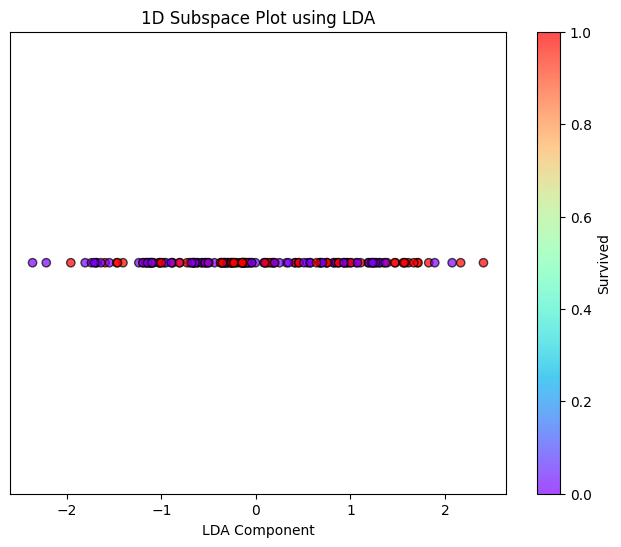

Class means: [[41.88311688  0.4025974  67.8961039   0.58441558  0.51948052]
 [45.          0.51807229 71.3253012   0.51807229  0.56626506]]


In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_train,np.zeros_like(X_train), c = Y_train, cmap = 'rainbow',alpha = 0.7,
            edgecolors ='k')
plt.title("1D Subspace Plot using LDA")
plt.xlabel('LDA Component')
plt.yticks([])
plt.colorbar(label = 'Survived')
plt.show()

print("Class means:",lda.means_)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(x_test)

Accuracy: 0.53


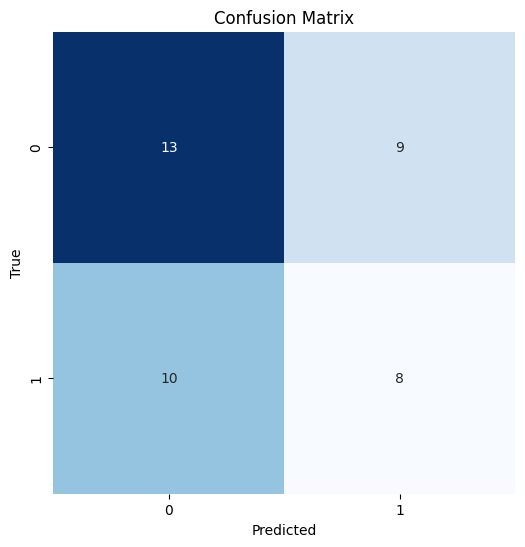

In [22]:

accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')


plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()